# Plantilla ML

### Modelos Basicos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge

import numpy as np
import pandas as pd

def model_test(x, y):
    # Modelos
    lr = LinearRegression()
    r = Ridge()
    l = Lasso()
    en = ElasticNet()
    br = BayesianRidge()
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    
    models = [
        lr, r, l, en, br, dt, rf,
    ]
    
    model_names = [
        "Linear Regression", "Ridge", "Lasso", "Elastic Net", "Bayesian Ridge",
        "Decision Tree", "Random Forest", 
    ]
    
    # Listas para almacenar métricas de rendimiento
    r2_scores = []
    mae_scores = []
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    for model in models:
        model.fit(x_train, y_train)  # Entrenar el modelo
        predictions = model.predict(x_test)  # Realizar predicciones
        r2_scores.append(np.round(r2_score(y_test, predictions) * 100, 2))  # Calcular R2
        mae_scores.append(np.round(mean_absolute_error(y_test, predictions), 2))  # Calcular MAE
    
    # Combinar los resultados en un DataFrame
    results = {"Model": model_names, "R2 Score": r2_scores, "MAE": mae_scores}
    results = pd.DataFrame(results)
    results = results.sort_values(by="R2 Score", ascending=False)  # Ordenar por R2 Score
    
    return results

### Modelos avanzados

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge

from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

import numpy as np
import pandas as pd


def model_test(x, y, use_cross_val=False, cv=5):
    # Modelos
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        BayesianRidge(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        XGBRegressor(verbosity=0),
        # LGBMRegressor(),
        # CatBoostRegressor(verbose=0)
    ]

    model_names = [
        "Linear Regression", "Ridge", "Lasso", "Elastic Net", "Bayesian Ridge",
        "Decision Tree", "Random Forest", "Gradient Boosting",
        "XGBoost", #"LightGBM", "CatBoost"
    ]
    
    # Métricas
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    mape_scores = []
    
    # División
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    for model in models:
        if use_cross_val:
            # Validación cruzada para R2
            r2 = cross_val_score(model, x, y, scoring='r2', cv=cv).mean()
            mae = -cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv).mean()
            mse = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv).mean()
            rmse = np.sqrt(mse)
            # MAPE no está directamente en sklearn, así que se omite en CV
            mape = np.nan
        else:
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            r2 = r2_score(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mape = mean_absolute_percentage_error(y_test, predictions)
        
        r2_scores.append(np.round(r2 * 100, 2))
        mae_scores.append(np.round(mae, 2))
        mse_scores.append(np.round(mse, 2))
        rmse_scores.append(np.round(rmse, 2))
        mape_scores.append(np.round(mape * 100, 2) if not np.isnan(mape) else None)
    
    # Resultados
    results = pd.DataFrame({
        "Model": model_names,
        "R2 Score (%)": r2_scores,
        "MAE": mae_scores,
        "MSE": mse_scores,
        "RMSE": rmse_scores,
        "MAPE (%)": mape_scores
    })
    
    return results.sort_values(by="R2 Score (%)", ascending=False)


### Modelos basicos + graficos de barras

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge


def model_test(x, y, use_cross_val=False, cv=5, plot=True):
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        BayesianRidge(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]

    model_names = [
        "Linear Regression", "Ridge", "Lasso", "Elastic Net", "Bayesian Ridge",
        "Decision Tree", "Random Forest", "Gradient Boosting"
    ]
    
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    mape_scores = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    for model in models:
        if use_cross_val:
            r2 = cross_val_score(model, x, y, scoring='r2', cv=cv).mean()
            mae = -cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv).mean()
            mse = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv).mean()
            rmse = np.sqrt(mse)
            mape = np.nan
        else:
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            r2 = r2_score(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mape = mean_absolute_percentage_error(y_test, predictions)
        
        r2_scores.append(np.round(r2 * 100, 2))
        mae_scores.append(np.round(mae, 2))
        mse_scores.append(np.round(mse, 2))
        rmse_scores.append(np.round(rmse, 2))
        mape_scores.append(np.round(mape * 100, 2) if not np.isnan(mape) else None)
    
    results = pd.DataFrame({
        "Model": model_names,
        "R2 Score (%)": r2_scores,
        "MAE": mae_scores,
        "MSE": mse_scores,
        "RMSE": rmse_scores,
        "MAPE (%)": mape_scores
    }).sort_values(by="R2 Score (%)", ascending=False)
    
    # 📊 GRÁFICOS
    if plot:
        metrics_to_plot = ["R2 Score (%)", "MAE", "RMSE"]
        if results["MAPE (%)"].notna().all():
            metrics_to_plot.append("MAPE (%)")
        
        for metric in metrics_to_plot:
            plt.figure(figsize=(10, 5))
            sns.barplot(data=results, x="Model", y=metric, palette="viridis")
            plt.title(f"Model Comparison - {metric}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

    return results

### Modelos avanzados + graficos de barras

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge

from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor


def model_test(x, y, use_cross_val=False, cv=5, plot=True):
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        BayesianRidge(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        XGBRegressor(verbosity=0),
        # LGBMRegressor(),
        # CatBoostRegressor(verbose=0)
    ]

    model_names = [
        "Linear Regression", "Ridge", "Lasso", "Elastic Net", "Bayesian Ridge",
        "Decision Tree", "Random Forest", "Gradient Boosting",
        "XGBoost", #"LightGBM", "CatBoost"
    ]
    
    r2_scores = []
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    mape_scores = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    for model in models:
        if use_cross_val:
            r2 = cross_val_score(model, x, y, scoring='r2', cv=cv).mean()
            mae = -cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv).mean()
            mse = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv).mean()
            rmse = np.sqrt(mse)
            mape = np.nan  # No disponible en CV directo
        else:
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            r2 = r2_score(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mape = mean_absolute_percentage_error(y_test, predictions)
        
        r2_scores.append(np.round(r2 * 100, 2))
        mae_scores.append(np.round(mae, 2))
        mse_scores.append(np.round(mse, 2))
        rmse_scores.append(np.round(rmse, 2))
        mape_scores.append(np.round(mape * 100, 2) if not np.isnan(mape) else None)
    
    results = pd.DataFrame({
        "Model": model_names,
        "R2 Score (%)": r2_scores,
        "MAE": mae_scores,
        "MSE": mse_scores,
        "RMSE": rmse_scores,
        "MAPE (%)": mape_scores
    }).sort_values(by="R2 Score (%)", ascending=False)
    
    # 📊 GRÁFICOS
    if plot:
        metrics_to_plot = ["R2 Score (%)", "MAE", "RMSE"]
        if results["MAPE (%)"].notna().all():
            metrics_to_plot.append("MAPE (%)")
        
        for metric in metrics_to_plot:
            plt.figure(figsize=(10, 5))
            sns.barplot(data=results, x="Model", y=metric, palette="viridis")
            plt.title(f"Model Comparison - {metric}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

    return results


## ¿Como usar esta función?

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# Leeer el vinotinto.csv

vinotinto_df = pd.read_csv('../data/processed/vinotinto.csv')


# Convertir quality_label a valores numéricos
label_encoder = LabelEncoder()
vinotinto_df['quality_label_encoded'] = label_encoder.fit_transform(vinotinto_df['quality_label'])

# Definir las características (X) y la variable objetivo (y)
X = vinotinto_df.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1)  # Eliminar 'quality' y 'quality_label'
y = vinotinto_df['quality_label_encoded']

# Balanceo de clases: calculamos los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.array([0, 1, 2]), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


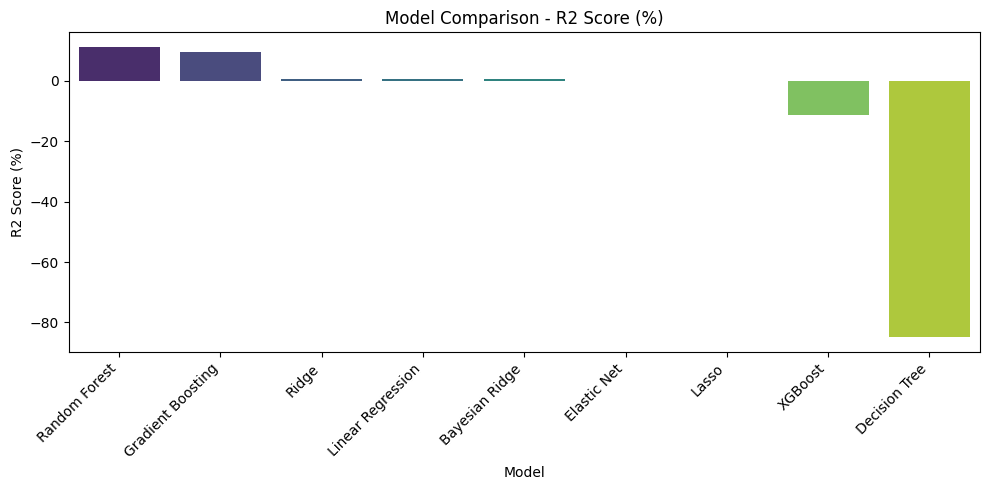

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


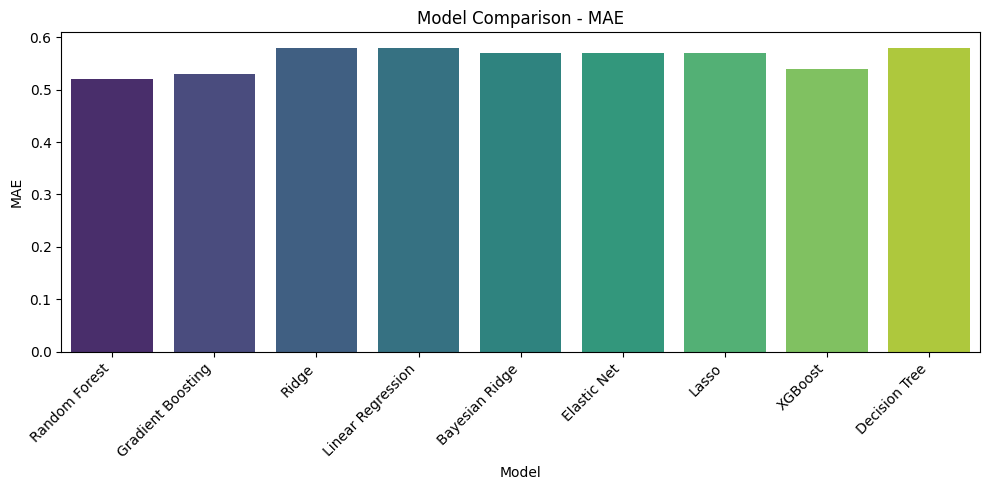

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


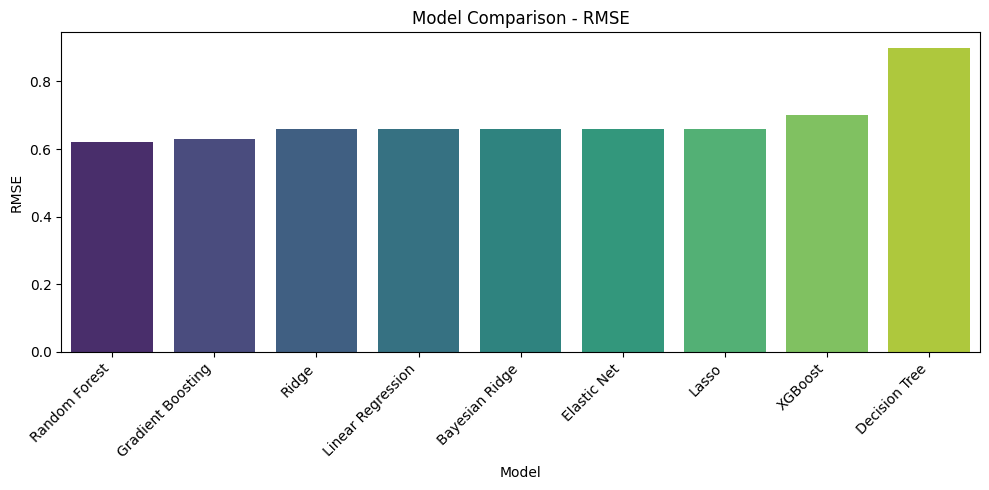

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


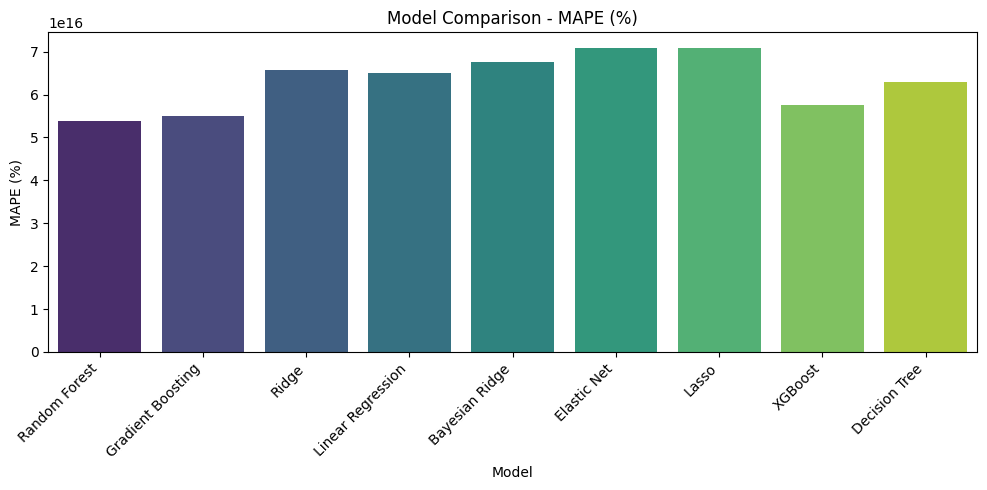

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


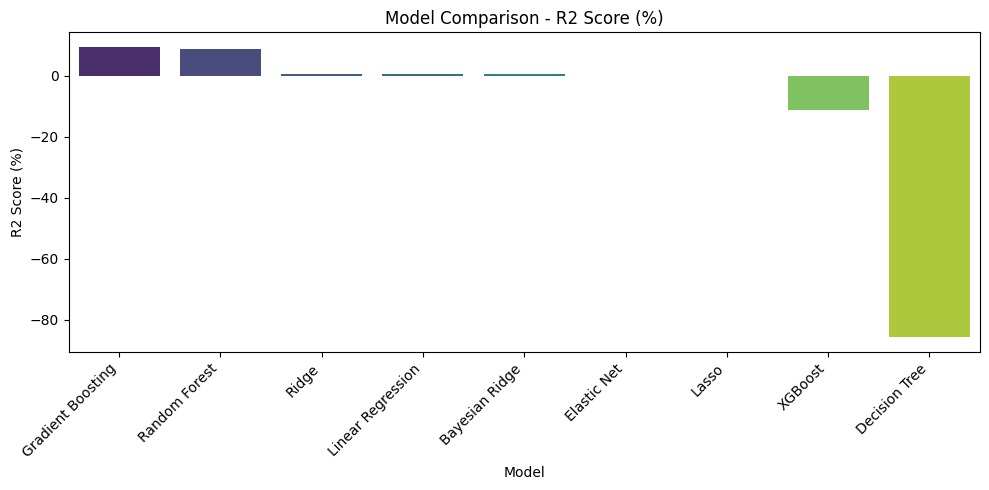

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


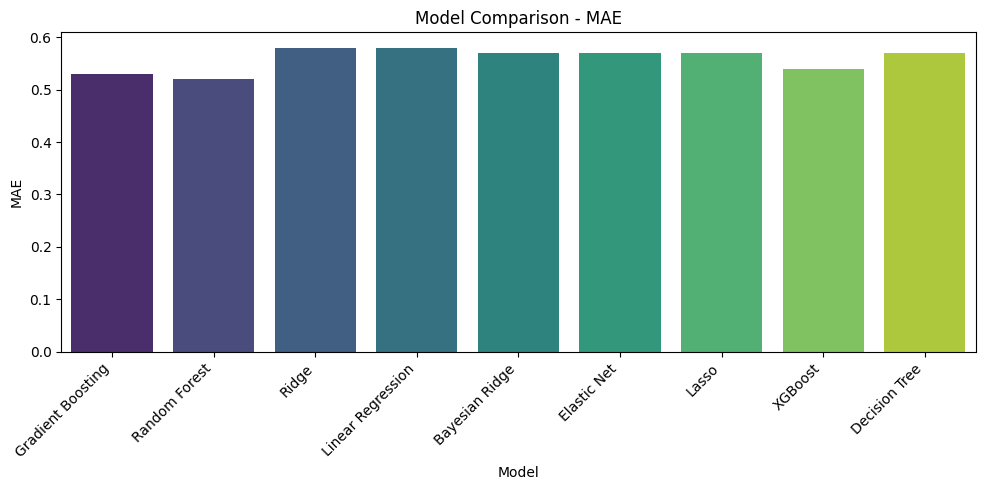

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


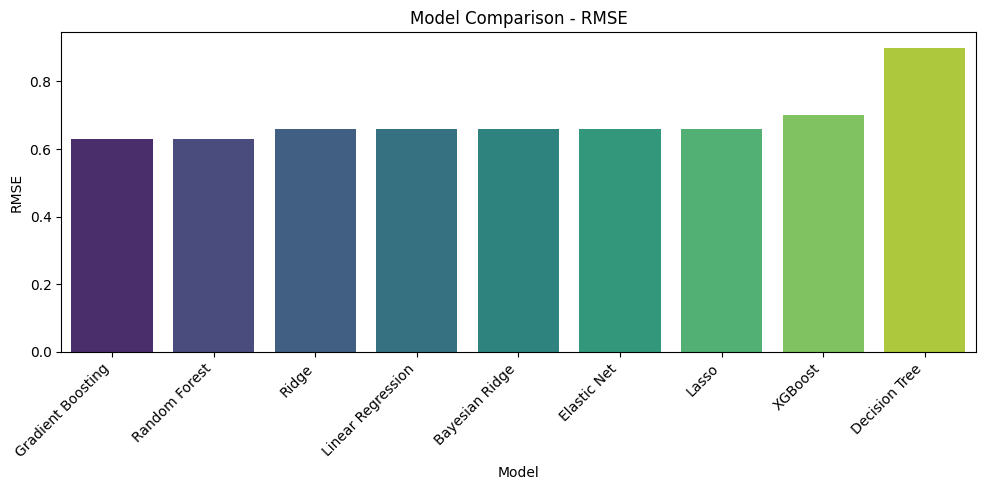

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


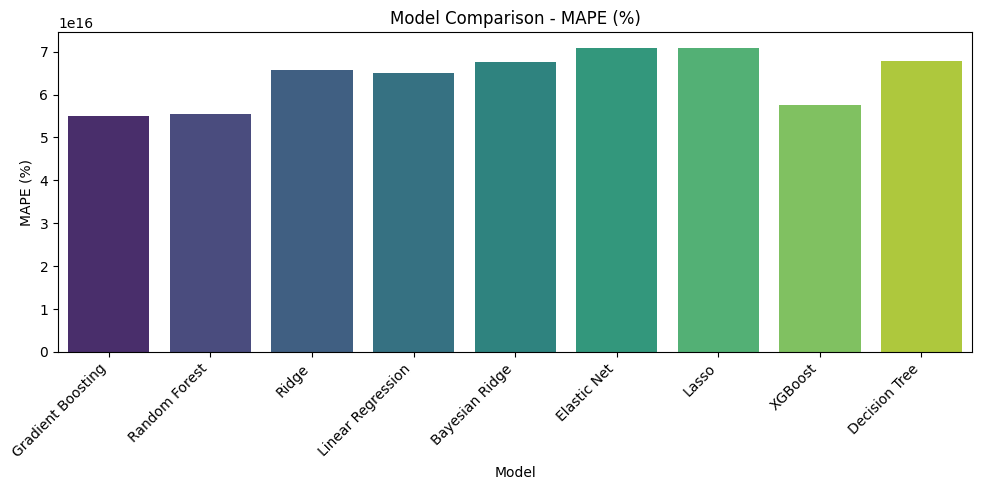

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


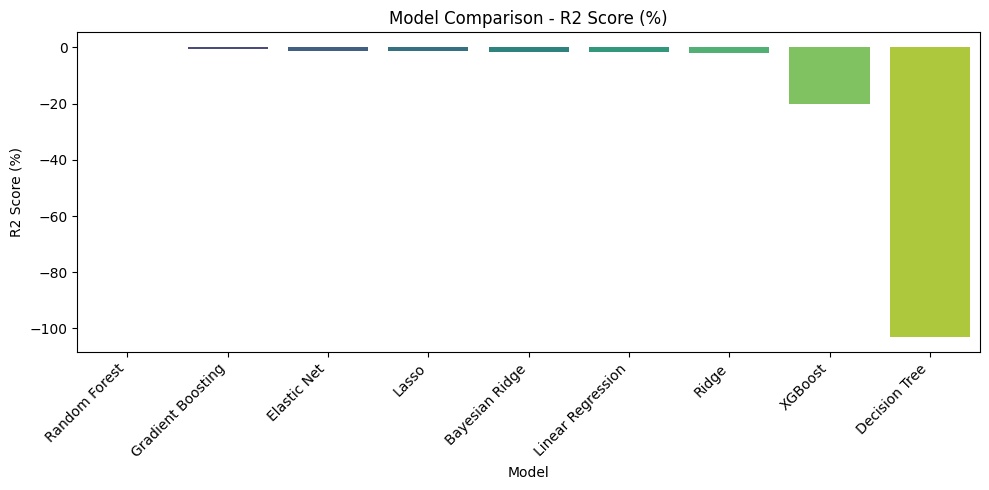

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


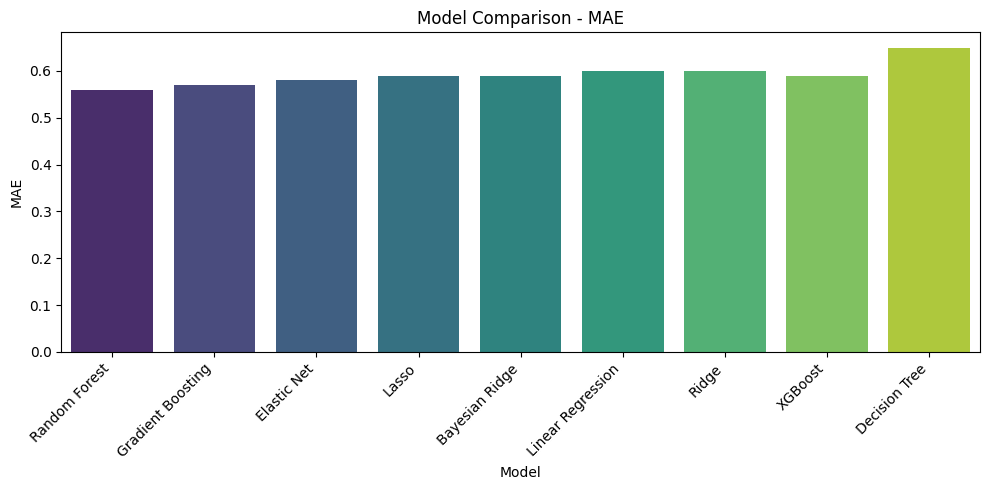

C:\Users\inaki\AppData\Local\Temp\ipykernel_8872\3981467550.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y=metric, palette="viridis")


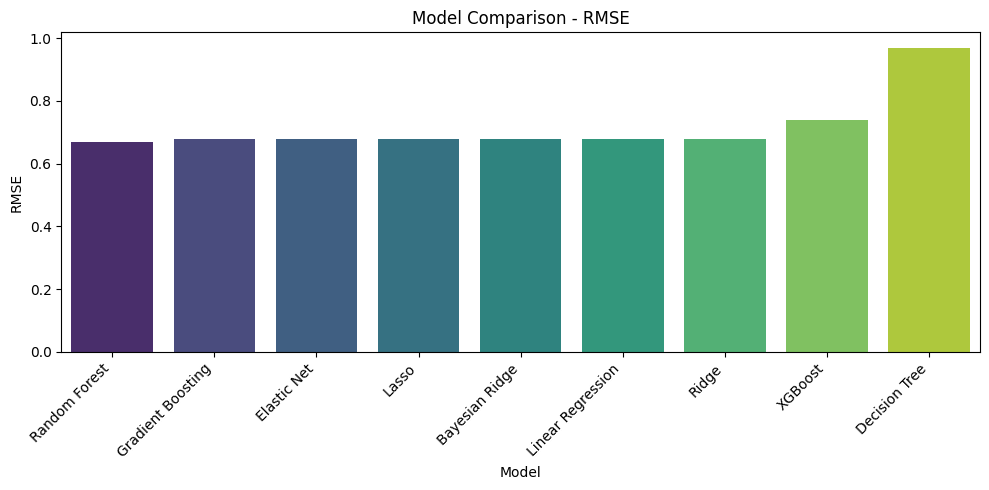

In [12]:
# Manera basica
model_test(X,y)

# Sin validación cruzada
results = model_test(X, y)

# Con validación cruzada (5 folds)
results_cv = model_test(X, y, use_cross_val=True, cv=5)